# Taller Final - Aprendizaje automático
Grupo "crimen"

*Integrantes*
- Juan Sebastián Gallego
- Nathalia Gamboa
- David Santiago Ovalle


## Tarea
Regresión

## Contextualización y problema
Analizar las variables con más pesos en la predicción de la variable objetivo: tasa de crímenes por cada 100 mil habitantes para una asesoría en políticas públicas a reducir esta tasa.

También se busca un modelo de regresión más adecuado posible para la variable objetivo.


# Importar librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
import pickle
import pylab as pl

from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn import model_selection, preprocessing
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

##DATOS
#Comunidades de Estados Unidos.
Los datos combinan los datos socioeconómicos del censo de 1990 de EE.UU., los de aplicación de la ley de la encuesta LEMAS de EE.UU. de 1990 y los de delincuencia del UCR del FBI de 1995.
Los datos estan clasificados en **1994** comunidades y **128** variables.

Las variables incluidas en el conjunto de datos tienen que ver con la comunidad, como el porcentaje de la población que se considera urbana, la renta familiar media, así como la raza de la poblacion y sus ingresos; igualmente con la aplicación de la ley, como el número per cápita de agentes de policía.

Así, se tiene la siguiente información:

**Variables nominales**
- **state**: Estado de EE.UU. (por número)
- **communityname**: Nombre de la comunidad

**Variable objetivo**
- **crimes_perpop**: crímenes por cada 100.000 habitantes

**Variables poblacionales**
- **population**: población por comunidad
- **household_size**: media de personas por hogar
- **racepct_black**: porcentaje de población afroamericana
- **racepct_white**: porcentaje de población caucásica
- **racepct_asian**: porcentaje de población de origen asiático
- **racepct_hisp**: porcentaje de población de origen hispano
- **pct_urban**: porcentaje de personas que viven en zonas clasificadas como urbanas

**Variables económicas**
-  **med_income**:  mediana de la renta de los hogares
- **med_fam_inc**: renta familiar mediana (difiere de la renta de los hogares no familiares)
- **percap_inc**: renta per cápita
- **white_percap**: renta per cápita de los caucásicos
- **black_percap**: renta per cápita de los afroamericanos
- **indian_percap**: renta per cápita de los nativos americanos
- **asian_percap**: renta per cápita de las personas de origen asiático
- **hisp_percap**: renta per cápita de las personas de origen hispano
-  **pctpop_underpov**: porcentaje de personas por debajo del nivel de pobreza
- **rent_median**: vivienda de alquiler - renta mediana

**Otras variables**
- **police_perpop**: agentes de policía por cada 100.000 habitantes
- **police_cars**: número de carros de policía



Nota: Las variables ya se encuentran normalizadas desde el origen.
La normalización preserva las relaciones aproximadas de los valores DENTRO de un atributo (por ejemplo, el doble del valor para el doble de la población dentro de la precisión disponible - excepto para los valores extremos (todos los valores más de 3 desviaciones estándar (DS) por encima de la media se normalizan a 1,00; todos los valores más de 3 DS por debajo de la media se normalizan a 0,00)).

Fuente: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

## Cargar Datos

In [ ]:
# df = pd.read_table('communities.data', delim_whitespace=True, header=None)
df = pd.read_excel('data.xlsx')
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column119,Column120,Column121,Column122,Column123,Column124,Column125,Column126,Column127,Column128
0,8,?,?,Lakewoodcity,1,19,33,2,9,12,...,12,26,2,0.06,0.04,0.9,0.5,32,0.14,2
1,53,?,?,Tukwilacity,1,0,16,12,74,45,...,2,12,45,?,?,?,?,0,?,67
2,24,?,?,Aberdeentown,1,0,42,49,56,17,...,1,21,2,?,?,?,?,0,?,43
3,34,5,81440,Willingborotownship,1,4,77,1,8,12,...,2,39,28,?,?,?,?,0,?,12
4,42,95,6096,Bethlehemtownship,1,1,55,2,95,9,...,4,9,2,?,?,?,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,1,4,1,87,12,...,1,28,5,?,?,?,?,0,?,9
1990,6,?,?,Seasidecity,10,5,96,46,28,83,...,2,37,2,?,?,?,?,0,?,45
1991,9,9,80070,Waterburytown,10,16,37,25,69,4,...,8,32,18,0.08,0.06,0.78,0,91,0.28,23
1992,25,17,72600,Walthamcity,10,8,51,6,87,22,...,3,38,33,0.02,0.02,0.79,0,22,0.18,19


##Análisis exploratorio y selección de variables clave

In [ ]:
#Renombramos las columnas para identificar cada variable
df_1 = df[["Column1", "Column4", "Column6", "Column7", "Column8", "Column9", "Column10", "Column11", "Column17", "Column18", "Column25", "Column26", 
           "Column27", "Column28", "Column29", "Column30", "Column32", "Column34", "Column89", "Column128"]]
df_1.columns = ["state", "community_name", "population", "household_size", "racepct_black", "racepct_white", "racepct_asian", "racepct_hisp", "pct_urban", 
                "med_income", "med_fam_inc", "percap_inc", "white_percap", "black_percap", "indian_percap", "asian_percap", "hisp_percap", 
                "pctpop_underpov", "rent_median", "crimes_perpop"]
df_1

,state,community_name,population,household_size,racepct_black,racepct_white,racepct_asian,racepct_hisp,pct_urban,med_income,med_fam_inc,percap_inc,white_percap,black_percap,indian_percap,asian_percap,hisp_percap,pctpop_underpov,rent_median,crimes_perpop
0,8,Lakewoodcity,19,33,2,9,12,17,1,37,39,4,39,32,27,27,41,19,35,2
1,53,Tukwilacity,0,16,12,74,45,7,1,31,29,37,38,33,16,3,35,24,38,67
2,24,Aberdeentown,0,42,49,56,17,4,0,3,28,27,29,27,7,29,39,27,29,43
3,34,Willingborotownship,4,77,1,8,12,1,1,58,51,36,4,39,16,25,44,1,7,12
4,42,Bethlehemtownship,1,55,2,95,9,5,9,5,46,43,41,28,0,74,48,6,36,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,1,4,1,87,12,16,1,42,41,49,5,27,0,16,52,16,39,9
1990,6,Seasidecity,5,96,46,28,83,32,1,28,24,18,2,26,18,2,26,32,54,45
1991,9,Waterburytown,16,37,25,69,4,25,1,31,35,31,34,25,19,28,28,31,34,23
1992,25,Walthamcity,8,51,6,87,22,1,1,44,47,4,4,29,2,31,37,16,62,19


##Limpieza del dataset

In [ ]:
# Detectamos cantidad de NA's
df_2 = df_1.replace(["?"], [np.nan])
df_2.isna().sum()
df_crime = df_2

# Se convierte state en variable nominal
df_crime["state"] = df_crime["state"].astype("str")
df_crime.dtypes

df_crime

,state,community_name,population,household_size,racepct_black,racepct_white,racepct_asian,racepct_hisp,pct_urban,med_income,med_fam_inc,percap_inc,white_percap,black_percap,indian_percap,asian_percap,hisp_percap,pctpop_underpov,rent_median,crimes_perpop
0,8,Lakewoodcity,19,33,2,9,12,17,1,37,39,4,39,32,27,27,41,19,35,2
1,53,Tukwilacity,0,16,12,74,45,7,1,31,29,37,38,33,16,3,35,24,38,67
2,24,Aberdeentown,0,42,49,56,17,4,0,3,28,27,29,27,7,29,39,27,29,43
3,34,Willingborotownship,4,77,1,8,12,1,1,58,51,36,4,39,16,25,44,1,7,12
4,42,Bethlehemtownship,1,55,2,95,9,5,9,5,46,43,41,28,0,74,48,6,36,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,1,4,1,87,12,16,1,42,41,49,5,27,0,16,52,16,39,9
1990,6,Seasidecity,5,96,46,28,83,32,1,28,24,18,2,26,18,2,26,32,54,45
1991,9,Waterburytown,16,37,25,69,4,25,1,31,35,31,34,25,19,28,28,31,34,23
1992,25,Walthamcity,8,51,6,87,22,1,1,44,47,4,4,29,2,31,37,16,62,19


In [ ]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            1994 non-null   object
 1   community_name   1994 non-null   object
 2   population       1994 non-null   int64 
 3   household_size   1994 non-null   int64 
 4   racepct_black    1994 non-null   int64 
 5   racepct_white    1994 non-null   int64 
 6   racepct_asian    1994 non-null   int64 
 7   racepct_hisp     1994 non-null   int64 
 8   pct_urban        1994 non-null   int64 
 9   med_income       1994 non-null   int64 
 10  med_fam_inc      1994 non-null   int64 
 11  percap_inc       1994 non-null   int64 
 12  white_percap     1994 non-null   int64 
 13  black_percap     1994 non-null   int64 
 14  indian_percap    1994 non-null   int64 
 15  asian_percap     1994 non-null   int64 
 16  hisp_percap      1994 non-null   int64 
 17  pctpop_underpov  1994 non-null   

Identificamos que hay 20 variables y 1994 registros. Además, en las variables elegidas ya no hay datos faltantes.

##Entendiendo los datos...
Todos los datos numéricos se encuentran normalizados en el rango de 0 a 100

In [ ]:
df_crime.describe()

,population,household_size,racepct_black,racepct_white,racepct_asian,racepct_hisp,pct_urban,med_income,med_fam_inc,percap_inc,white_percap,black_percap,indian_percap,asian_percap,hisp_percap,pctpop_underpov,rent_median,crimes_perpop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000,1994.000000
mean,4.671515,41.126379,14.004514,70.005015,11.874624,10.601805,9.867603,31.504012,33.361083,30.222668,31.849047,25.869107,17.592778,28.196088,33.852558,26.271815,32.44333,19.550652
std,9.470790,18.664145,20.796399,30.128841,15.636562,17.222720,26.494687,20.932722,20.563121,18.884989,19.234491,16.885953,14.475672,18.723171,18.962856,21.976139,21.48856,20.239997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,33.000000,1.000000,54.250000,3.000000,1.000000,0.000000,16.000000,19.000000,18.000000,21.000000,15.000000,8.000000,16.000000,22.000000,8.000000,16.00000,5.000000
50%,2.000000,42.000000,4.000000,83.000000,6.000000,3.000000,1.000000,27.000000,29.000000,27.000000,29.000000,23.000000,16.000000,26.000000,33.000000,19.000000,28.00000,12.000000
75%,5.000000,52.000000,16.000000,94.000000,14.000000,11.000000,1.000000,45.000000,46.000000,41.000000,42.000000,35.000000,24.000000,38.000000,45.000000,42.000000,47.75000,27.750000
max,99.000000,99.000000,99.000000,99.000000,98.000000,99.000000,99.000000,99.000000,98.000000,98.000000,99.000000,95.000000,88.000000,99.000000,99.000000,99.000000,99.00000,97.000000


Se grafíca el boxplot para todas las variables

In [ ]:
fig = go.Figure()
for index, column in df_crime.iloc[:, 2:].iteritems():
    fig.add_trace(go.Box(y=column, name=index))

fig.show()

Se grafíca el boxplot solo para la variable objetivo

In [ ]:
fig = go.Figure()
for index, column in df_crime[['crimes_perpop']].iteritems():
    fig.add_trace(go.Box(y=column, name=index))

fig.show()

Las tasas de crímenes por cada 100.000 habitantes, en las comunidades tienen un mínimo de 0 crímenes, una media de 19.55, la mediana de 12 y un máximo de 97.
Sin embargo, el 50% de los datos de esta variable se encuentran entre 5 y 28.

La diferencia entre la mediana y la media es un indicador de outliers.

Se revisa la correlación entre las variables numéricas, principalmente con la variable objetivo (**crímenes** por cada 100.000 habitantes)

In [ ]:
corr = df_crime.corr()

fig = go.Figure(data=go.Heatmap(z=corr.values,
                         x=corr.columns.values,
                         y=corr.columns.values))
fig.show()

Al analizar los resultados sintetizados en el heatmap, es posible identificar que la variable objetivo **(crimes_perpop)** correspondiente a los crímenes por cada 100 mil habitantes, se correlaciona en mayor medida con la variable **(racepct_black)**. Es decir, con aquellas personas de raza negra. Cabe resaltar que también hay una importante correlación con la variable **(pctpop_underpov)** es decir, aquellas personas por debajo del nivel de pobreza. Por estas razones, podría inferirse que las personas de raza negra por debajo de la línea de la pobreza son aquellas personas que en mayor medida se ven involucradas en crímenes.

Con respecto a la **variable objetivo** corresponde anotar tambien que tiene una muy baja correlación con la variable **(racepct_white)** la cual está asociada a las personas de raza blanca, añadido a esto, es posible notar que tiene una correlación en sentido inverso con las variables asociadas a la renta de las familias (med_fam_inc), (percap_inc) y (med_income), con lo cual podría inferirse que los crímenes no estan asociados estrictamente al nivel de renta de las familias.

Finalmente, al analizar las variables asociadas a la raza de las personas, es posible notar que aquellas personas de raza asiática tienen la correlación más cercana a cero con la variable de crímenes, lo que permite inferir que estas personas son las que en menor medida se ven involucradas en actos violentos.

#Análisis de regresiones
## Se separa la variable objetivo (crímenes por cada 100.000 habitantes)
Con esto, se busca encontrar los pesos de las distintas variables para validar cada una de ellas cómo influye en los crímenes.

In [ ]:
y = df_crime['crimes_perpop']
x = df_crime.drop(['crimes_perpop', 'state', 'community_name'], axis=1)
x.head()

,population,household_size,racepct_black,racepct_white,racepct_asian,racepct_hisp,pct_urban,med_income,med_fam_inc,percap_inc,white_percap,black_percap,indian_percap,asian_percap,hisp_percap,pctpop_underpov,rent_median
0,19,33,2,9,12,17,1,37,39,4,39,32,27,27,41,19,35
1,0,16,12,74,45,7,1,31,29,37,38,33,16,3,35,24,38
2,0,42,49,56,17,4,0,3,28,27,29,27,7,29,39,27,29
3,4,77,1,8,12,1,1,58,51,36,4,39,16,25,44,1,7
4,1,55,2,95,9,5,9,5,46,43,41,28,0,74,48,6,36


## Se parte el dataset en entrenamiento - pruebas

In [ ]:
print('Población:'+str(len(x)))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print('Muestra para Entrenamiento:'+str(len(x_train)))
print('Muestra para Pruebas:'+str(len(x_test)))

Población:1994
Muestra para Entrenamiento:1395
Muestra para Pruebas:599


## Realizamos una función para el modelo polinomial para poder realizar varias pruebas

In [ ]:
def model(train:pd.DataFrame, test:pd.DataFrame ):
  model_poly = PolynomialFeatures(degree=2)
  x_train_poly = model_poly.fit_transform(train)
  x_test_poly = model_poly.fit_transform(test)

  global model_linpoly
  model_linpoly = LinearRegression()
  model_linpoly.fit(x_train_poly, y_train)
  model_linpoly.feature_names_ = model_poly.get_feature_names_out()

  return model_linpoly.score(x_test_poly, y_test)

## Establecemos parámetros para proceder con los modelos 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Regresión con variables poblacionales


In [ ]:
columnas_poblacional = ["population", "household_size", "racepct_black", "racepct_white", "racepct_asian", "racepct_hisp", "pct_urban"]
x_train_P = x_train[columnas_poblacional]
x_test_P = x_test[columnas_poblacional]
print("El R^2 utilizando variables poblacionales es " + str(round(model(x_train_P,x_test_P),2)))

El R^2 utilizando variables poblacionales es 0.31


In [ ]:
print(model_linpoly.coef_)
print('\nCantidad de coeficientes: ' + str(len(model_linpoly.coef_)))

[ 3.67194097e-16  6.80809787e-01  1.04227333e-01  2.61265284e-01
  2.76169294e-01 -7.46466163e-02 -3.93372230e-02 -3.79460108e-01
 -4.55720250e-03 -2.09694763e-03 -4.82586200e-03  6.70764226e-04
  3.79803163e-03 -3.82667774e-03 -3.63506226e-03 -5.86869589e-04
 -6.50799594e-04 -1.85167343e-03  1.51946492e-03 -3.40464439e-03
  1.08352679e-03 -8.48853168e-04  1.07208167e-03 -4.23890366e-03
  2.78052188e-03  4.18621595e-03 -3.52401680e-03 -2.44550940e-03
  2.45978009e-03  2.38232413e-03  1.13252075e-03  1.44341051e-03
 -5.38929532e-04  2.68733988e-03  2.51662062e-03  8.03753090e-04]

Cantidad de coeficientes: 36


In [ ]:
' + '.join(['('+str(c)+')*'+f for c,f in 
          zip(model_linpoly.coef_, model_linpoly.feature_names_)])

'(3.6719409695456915e-16)*1 + (0.6808097869223227)*population + (0.10422733261282154)*household_size + (0.2612652839060917)*racepct_black + (0.2761692944274522)*racepct_white + (-0.07464661625998678)*racepct_asian + (-0.039337222998039975)*racepct_hisp + (-0.3794601076357354)*pct_urban + (-0.004557202496388525)*population^2 + (-0.002096947633263337)*population household_size + (-0.004825861997438841)*population racepct_black + (0.0006707642255264482)*population racepct_white + (0.003798031628655934)*population racepct_asian + (-0.0038266777384921625)*population racepct_hisp + (-0.0036350622586231863)*population pct_urban + (-0.0005868695892983938)*household_size^2 + (-0.0006507995941511309)*household_size racepct_black + (-0.0018516734297480842)*household_size racepct_white + (0.0015194649206228586)*household_size racepct_asian + (-0.00340464439462755)*household_size racepct_hisp + (0.00108352678994179)*household_size pct_urban + (-0.0008488531675443124)*racepct_black^2 + (0.0010720816

## Regresión con variables económicas

In [ ]:
columnas_economicas = ["med_income", "med_fam_inc", "percap_inc", "white_percap", 
                "black_percap", "asian_percap", "indian_percap", "hisp_percap", "pctpop_underpov", 
                "rent_median"]
x_train_E = x_train[columnas_economicas]
x_test_E = x_test[columnas_economicas]
print("El R^2 utilizando variables económicas es " + str(round(model(x_train_E,x_test_E),2)))

El R^2 utilizando variables económicas es 0.23


In [ ]:
print(model_linpoly.coef_)
print('\nCantidad de coeficientes: ' + str(len(model_linpoly.coef_)))

[ 9.18667003e-16 -1.34478855e-01 -2.63896727e-01 -3.62920681e-01
  3.08604649e-01 -4.14201821e-02  1.25735033e-01  5.53801992e-02
 -1.36265488e-02 -1.39003469e-01  2.85946259e-03 -3.27692386e-05
  3.86972732e-03  1.05824766e-03 -3.39095793e-03  2.59737284e-03
 -1.07489636e-03  9.85915908e-04 -9.40857021e-04  1.15407461e-03
 -5.85621056e-04 -4.32462592e-03  2.03243680e-03  6.48180748e-04
  1.77586630e-03  2.84272464e-03  1.92591834e-03  1.94825307e-03
 -1.95089393e-04 -2.10084612e-03  3.17170998e-03 -1.98939505e-03
  2.42572728e-03 -2.48047650e-03  4.43289999e-04  1.43199761e-04
  4.25232831e-03 -4.98395497e-04  2.02003125e-03 -2.69091508e-03
  1.93355687e-04 -3.32606405e-04 -1.90411833e-03  1.15438490e-03
 -1.37037024e-03 -3.93842869e-03  5.41515924e-04  1.87508645e-03
 -6.45398860e-04  5.04304010e-03  3.06123831e-04 -2.75033648e-03
 -1.35220472e-03  9.41232720e-04  3.07398236e-03 -3.90927515e-05
 -2.57566155e-03 -7.92238820e-04  2.02430725e-03 -1.69440994e-03
  3.54729161e-04 -1.19445

In [ ]:
' + '.join(['('+str(c)+')*'+f for c,f in 
          zip(model_linpoly.coef_, model_linpoly.feature_names_)])

'(9.186670029486646e-16)*1 + (-0.13447885474920132)*med_income + (-0.2638967271614761)*med_fam_inc + (-0.36292068107810477)*percap_inc + (0.30860464864880627)*white_percap + (-0.04142018206433499)*black_percap + (0.1257350331034615)*asian_percap + (0.05538019924982394)*indian_percap + (-0.013626548790532792)*hisp_percap + (-0.13900346944353648)*pctpop_underpov + (0.002859462592756188)*rent_median + (-3.276923864535487e-05)*med_income^2 + (0.0038697273216998277)*med_income med_fam_inc + (0.0010582476646231681)*med_income percap_inc + (-0.003390957925776904)*med_income white_percap + (0.0025973728362682653)*med_income black_percap + (-0.0010748963648740308)*med_income asian_percap + (0.0009859159078768956)*med_income indian_percap + (-0.000940857021253589)*med_income hisp_percap + (0.001154074609605666)*med_income pctpop_underpov + (-0.0005856210556308902)*med_income rent_median + (-0.004324625918857086)*med_fam_inc^2 + (0.002032436798426379)*med_fam_inc percap_inc + (0.00064818074824859

## Regresión con variables más correlacionadas

In [ ]:
columnas_mascorr = ["percap_inc", "pctpop_underpov", "population", "racepct_black", "racepct_white"]
x_train_mascorr = x_train[columnas_mascorr]
x_test_mascorr = x_test[columnas_mascorr]
print("El R^2 utilizando las variables más correlacionadas es " + str(round(model(x_train_mascorr,x_test_mascorr),2)))


El R^2 utilizando las variables más correlacionadas es 0.36


In [ ]:
print(model_linpoly.coef_)
print('\nCantidad de coeficientes: ' + str(len(model_linpoly.coef_)))

[ 0.00000000e+00 -4.93438160e-01  5.01667376e-01  3.01036801e-01
  4.85617304e-01  2.81107556e-01  1.42751684e-04  6.01905346e-03
 -5.52051086e-04 -9.42301160e-04  4.39310543e-03 -4.88132834e-03
  2.66485192e-03 -1.48432402e-04 -2.10007032e-03 -3.60220338e-03
 -3.41129201e-03  1.71907970e-03 -3.19250482e-03 -2.24080485e-03
 -4.58948845e-03]

Cantidad de coeficientes: 21


In [ ]:
' + '.join(['('+str(c)+')*'+f for c,f in 
          zip(model_linpoly.coef_, model_linpoly.feature_names_)])

'(0.0)*1 + (-0.49343816008416774)*percap_inc + (0.5016673763345693)*pctpop_underpov + (0.3010368008399166)*population + (0.4856173035715771)*racepct_black + (0.2811075564946856)*racepct_white + (0.00014275168439802937)*percap_inc^2 + (0.0060190534645976615)*percap_inc pctpop_underpov + (-0.0005520510864088975)*percap_inc population + (-0.0009423011604167801)*percap_inc racepct_black + (0.004393105431634536)*percap_inc racepct_white + (-0.004881328341131717)*pctpop_underpov^2 + (0.0026648519183174305)*pctpop_underpov population + (-0.00014843240210708937)*pctpop_underpov racepct_black + (-0.0021000703160269324)*pctpop_underpov racepct_white + (-0.003602203382159363)*population^2 + (-0.0034112920072653587)*population racepct_black + (0.0017190796996751079)*population racepct_white + (-0.003192504823157284)*racepct_black^2 + (-0.002240804852328998)*racepct_black racepct_white + (-0.0045894884462945595)*racepct_white^2'

# Lineal simple

In [ ]:
y = df_crime['crimes_perpop']
x = df_crime.drop(["state", "community_name", "med_income", "med_fam_inc", "percap_inc", "white_percap", 
                "black_percap", "asian_percap", "indian_percap", "hisp_percap", "pctpop_underpov", 
                "rent_median", "population", "household_size", "racepct_asian", "racepct_hisp", "pct_urban", "crimes_perpop"], axis=1)
x.head()

,racepct_black,racepct_white
0,2,9
1,12,74
2,49,56
3,1,8
4,2,95


In [ ]:
model_ols = LinearRegression()
model_ols.fit(x_train, y_train)

# Score del modelo (R-squared o R2)
model_ols.score(x_test, y_test)

0.34120247791984804

In [ ]:
print(model_ols.coef_)

[ 0.22633522 -0.08126068  0.2316649  -0.09207649  0.03661589  0.15820572
 -0.01444598 -0.03957555 -0.08008878 -0.03137831 -0.00922374 -0.02856833
 -0.03098592  0.01316769 -0.01828252  0.1340659   0.05952864]


***y*** =  0.23 - 0.08(*med_income*) + **0.23(*med_fam_inc*)** - 0.09(*percap_inc*) + 0.03(*white_percap*) + **0.15(*black_percap*)** - 0.01(*asian_percap*) - 0.03(*indian_percap*) - 0.08(*hisp_percap*) - 0.03(*pctpop_underpov*) - 0.01(*rent_median*) - 0.03(*population*) - 0.03(*household_size*) + 0.01(*racepct_asian*) - 0.02(*racepct_hisp*) + **0.13(*pct_urban*)**


Las variables ingreso medio por familia, ingresos medios de personas de raza negra y la población urbana son las que más contribuyen al incremento de los crímenes por cada 100.000 habitantes.

# Regularizar

Para buscar un mejor score y optimizar el modelo

In [ ]:
y = df_crime['crimes_perpop']
x = df_crime.drop(["state", "community_name", "crimes_perpop"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x.head()

,population,household_size,racepct_black,racepct_white,racepct_asian,racepct_hisp,pct_urban,med_income,med_fam_inc,percap_inc,white_percap,black_percap,indian_percap,asian_percap,hisp_percap,pctpop_underpov,rent_median
0,19,33,2,9,12,17,1,37,39,4,39,32,27,27,41,19,35
1,0,16,12,74,45,7,1,31,29,37,38,33,16,3,35,24,38
2,0,42,49,56,17,4,0,3,28,27,29,27,7,29,39,27,29
3,4,77,1,8,12,1,1,58,51,36,4,39,16,25,44,1,7
4,1,55,2,95,9,5,9,5,46,43,41,28,0,74,48,6,36


## Lasso

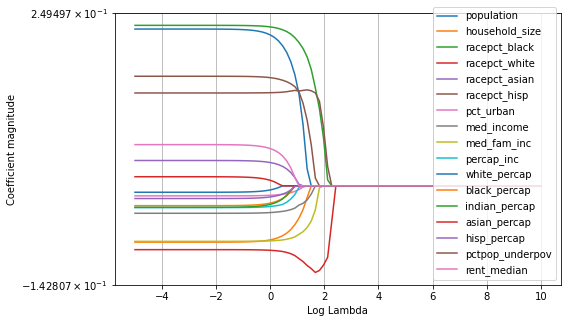

In [ ]:
a_exp = np.linspace(-5, 10, num=100)
alpha_range = [10**a for a in a_exp]
coefs = []

for i, alpha in enumerate(alpha_range):
    modelo = linear_model.Lasso(alpha=alpha)
    modelo.fit(x_train, y_train) # Solo aquí se está entrenando el modelo
    coefs.append(modelo.coef_)

plt.subplots(figsize=(8, 5))
plt.plot(a_exp, coefs)
plt.yscale("symlog")
plt.ylabel("Coefficient magnitude")
plt.xlabel("Log Lambda")
plt.legend(x_train.columns, loc='lower right')
plt.grid()

En la gráfica anterior se puede visualizar que si penalizamos mucho el peso de las variables (**Lambda** = 2.5 aproximadamente), el modelo elimina todas las variables predictivas y esto no nos da ningún resultado.

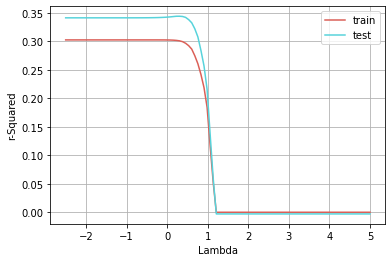

In [ ]:
colors = sns.hls_palette(2)

train_error = np.empty(len(alpha_range))
test_error = np.empty(len(alpha_range))
coefs = []

for i, alpha in enumerate(alpha_range):
    modelo = linear_model.Lasso(alpha=alpha)
    modelo.fit(x_train, y_train)

    train_error[i] = r2_score(y_train, modelo.predict(x_train))
    test_error[i] = r2_score(y_test, modelo.predict(x_test))
    coefs.append(modelo.coef_)

plt.plot(a_exp/2, train_error, label='train', color=colors[0])
plt.plot(a_exp/2, test_error, label='test', color=colors[1])
plt.ylabel('r-Squared')
plt.xlabel('Lambda')
plt.grid()
plt.legend(loc='upper right')

Cambiamos el valor de alpha a 0.1

In [ ]:
modelo_reg = linear_model.Lasso(alpha=0.1)
modelo_reg.fit(x_train, y_train)
mean_squared_error(y_test, modelo_reg.predict(x_test))

252.30178326855895

Se define una curva de entrenamiento para ver el sobreajuste

In [ ]:
def curva_entrenamiento(modelo, x, y) :
    train_size, train_score, test_score = learning_curve(modelo, x, y, train_sizes = np.array([0.1, 0.33, 0.55, 0.78, 1.])) 
                                                         #train_sizes=np.linspace(.1, 1.0, 10))
    plt.plot(train_size,np.mean(train_score,axis=1), label="Score Entrenamiento")
    plt.plot(train_size,np.mean(test_score,axis=1),label="Score Pruebas")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend()
    plt.grid()

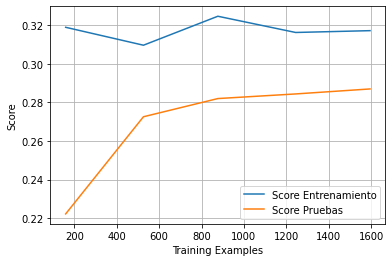

In [ ]:
curva_entrenamiento(modelo_reg, x, y)

## Ridge

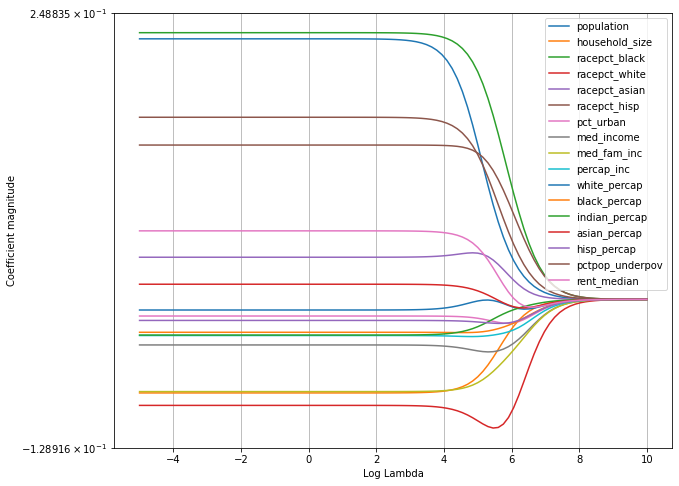

In [ ]:
a_exp = np.linspace(-5, 10, num=100)
alpha_range = [10**a for a in a_exp]
coefs = []

for i, alpha in enumerate(alpha_range):
    modelo = linear_model.Ridge(alpha=alpha)
    modelo.fit(x_train, y_train) # Solo aquí se está entrenando el modelo
    coefs.append(modelo.coef_)

plt.subplots(figsize=(10, 8))
plt.plot(a_exp, coefs)
plt.yscale("symlog")
plt.ylabel("Coefficient magnitude")
plt.xlabel("Log Lambda")
plt.legend(x_train.columns, loc='upper right')
plt.grid()

En la gráfica anterior se puede visualizar que el modelo elimina todas las variables predictivas a partir de un Lambda de entre 8 y 9, a diferencia de Lasso, que es más bajo, dado que le da una mayor importancia a las variables que tienen un coeficiente más alto.

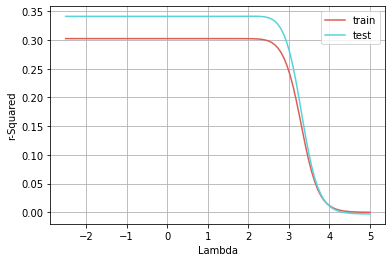

In [ ]:
colors = sns.hls_palette(2)

train_error = np.empty(len(alpha_range))
test_error = np.empty(len(alpha_range))
coefs = []

for i, alpha in enumerate(alpha_range):
    modelo = linear_model.Ridge(alpha=alpha)
    modelo.fit(x_train, y_train)

    train_error[i] = r2_score(y_train, modelo.predict(x_train))
    test_error[i] = r2_score(y_test, modelo.predict(x_test))
    coefs.append(modelo.coef_)

plt.plot(a_exp/2, train_error, label='train', color=colors[0])
plt.plot(a_exp/2, test_error, label='test', color=colors[1])
plt.ylabel('r-Squared')
plt.xlabel('Lambda')
plt.grid()
plt.legend(loc='upper right')

In [ ]:
modelo_reg = linear_model.Ridge(alpha=10**1)
modelo_reg.fit(x_train, y_train)
mean_squared_error(y_test, modelo_reg.predict(x_test))

252.3524019820089

# Conclusiones

## 1. Para el análisis de correlaciones.
- Tanto en el mapa de calor como en las distintas gráficas de relación entre componentes se identifica que la relación directamente proporcional con las altas tasas de crímenes se da en comunidades con mayor presencia de personas de raza negra. Caso contrario con las comunidades de mayor cantidad de personas caucásicas, donde la relación es inversa.

- Al analizar las correlaciones de la variable concerniente a los crimenes por cada 100 mil habitantes es posible inferir que las variables asociadas a la renta de los hogares (renta per cápita y mediana de la renta de los hogares)  tienen correlación en sentido inverso con los crimenes, lo cual quiere decir que podrían ser inversamente proporcionales.

- Las personas de origen asiático tienen la correlación más cercana a cero con la variable de crimenes, lo cual permite inferir que son el grupo poblacional menos involucrado en actos violentos.

## 2. Para las regresiones

- Después de revisar las regresiones realizadas, la que tuvo un R2 más alto fue la que tenia las variables independientes más correlacionadas con los crímenes (Variable objetivo).

- Las gráficas de regularización evidencian nuevamente, que las variables que más inciden en el incremento de los crímenes en Estados Unidos son: la cantidad de población de raza negra, la cantidad de población en general, la población hispana y la población por debajo de la línea de la pobreza. Por el contrario, la población blanca, el incremento en el ingreso medio de la población de raza negra y de los hogares incide en menores tasas de crímenes.

- En términos generales, los "scores" de todos los modelos son bajos y pese a intentar el método de la regularización, siguen dando valores de R2 menores a 0.4, la razón de esto puede ser la baja calidad del dataset de origen.